<a href="https://colab.research.google.com/github/dropthejase/ml_training/blob/main/ml_from_scratch/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
def get_data(train_split=0.8):
  # col 1 are labels
  data = pd.read_csv('sample_data/mnist_train_small.csv',header=None).values.astype(np.float32)
  data = shuffle(data)

  N = len(data)
  idx = int(N * train_split)

  Xtrain = data[:idx, 1:] / 255
  Ytrain = data[:idx, 0].astype(np.int32)

  Xtest = data[idx:, 1:] / 255
  Ytest = data[idx:, 0].astype(np.int32)

  return Xtrain, Xtest, Ytrain, Ytest

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = get_data()

In [ ]:
cov_x = np.cov(Xtrain, rowvar=False)

In [ ]:
lambdas, Q = np.linalg.eigh(cov_x)

In [ ]:
# sort descending
sort_idx = np.argsort(-lambdas)

In [ ]:
Q = Q[:, sort_idx]
lambdas = lambdas[sort_idx]
lambdas = np.maximum(lambdas, 0) # gets rid of very tiny negatives

In [ ]:
Z = Xtrain.dot(Q)

In [ ]:
Ytrain.shape, Z.shape

((16000,), (16000, 784))

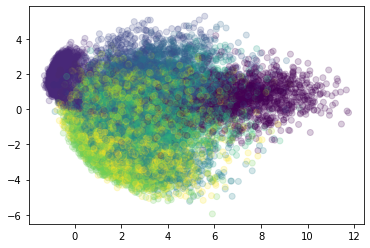

In [ ]:
plt.scatter(Z[:,0], Z[:, 1 ], c=Ytrain, alpha=0.2)
plt.show()

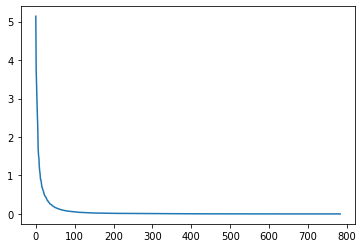

In [ ]:
plt.plot(lambdas)
plt.show()